In [42]:
import json
import pandas as pd

# Load JSON file
with open("youtube_data_vangogh_expanded.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Extract top-level list
videos = data["youtube"]

# Flatten all comments and replies
all_comments = []

for video in videos:
    video_id = video.get("video_id")
    video_title = video.get("title")
    video_comments = video.get("comments", [])

    for comment in video_comments:
        # Top-level comment
        all_comments.append({
            "video_id": video_id,
            "video_title": video_title,
            "author": comment.get("author"),
            "text": comment.get("text"),
            "likes": comment.get("likes"),
            "published_at": comment.get("published_at"),
            "reply": False
        })

        # Any replies?
        for reply in comment.get("replies", []):
            all_comments.append({
                "video_id": video_id,
                "video_title": video_title,
                "author": reply.get("author"),
                "text": reply.get("text"),
                "likes": reply.get("likes"),
                "published_at": reply.get("published_at"),
                "reply": True
            })

# Create DataFrame
df_youtube = pd.DataFrame(all_comments)

# Preview
print(df_youtube.head())


      video_id                                        video_title  \
0  4fwDVlnoC98  Van Gogh’s Mental Illness:  Was Epilepsy Respo...   
1  4fwDVlnoC98  Van Gogh’s Mental Illness:  Was Epilepsy Respo...   
2  4fwDVlnoC98  Van Gogh’s Mental Illness:  Was Epilepsy Respo...   
3  4fwDVlnoC98  Van Gogh’s Mental Illness:  Was Epilepsy Respo...   
4  4fwDVlnoC98  Van Gogh’s Mental Illness:  Was Epilepsy Respo...   

               author                                               text  \
0     @peterdavies777  This is my favourite artist, maybe its not a s...   
1       @vcwloves9864  I had a really violent seizure a few years bac...   
2      @CreativaArtly  As someone with epilepsy as well, I definitely...   
3  @claudesilverio677  Epileptic  States can be provoced by thujon, t...   
4  @jessicabiddle9696  I wonder if autism was any bit related. Epilep...   

   likes          published_at  reply  
0      0  2025-04-16T09:04:26Z  False  
1      0  2024-12-18T14:34:45Z  False  
2      0

In [43]:
len(df_youtube)

81434

In [44]:
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException

def is_english(text):
    try:
        return detect(text) == 'en'
    except LangDetectException:
        return False

df_youtube["is_english"] = df_youtube["text"].apply(is_english)


In [45]:
df_youtube["is_english"].value_counts(normalize=True)
df_youtube_en = df_youtube[df_youtube["is_english"] == True].copy()

In [46]:
df_youtube_en.head(10)

,video_id,video_title,author,text,likes,published_at,reply,is_english
0,4fwDVlnoC98,Van Gogh’s Mental Illness: Was Epilepsy Respo...,@peterdavies777,"This is my favourite artist, maybe its not a s...",0,2025-04-16T09:04:26Z,False,True
1,4fwDVlnoC98,Van Gogh’s Mental Illness: Was Epilepsy Respo...,@vcwloves9864,I had a really violent seizure a few years bac...,0,2024-12-18T14:34:45Z,False,True
2,4fwDVlnoC98,Van Gogh’s Mental Illness: Was Epilepsy Respo...,@CreativaArtly,"As someone with epilepsy as well, I definitely...",0,2023-11-05T14:53:40Z,False,True
3,4fwDVlnoC98,Van Gogh’s Mental Illness: Was Epilepsy Respo...,@claudesilverio677,"Epileptic States can be provoced by thujon, t...",0,2022-12-28T00:32:44Z,False,True
4,4fwDVlnoC98,Van Gogh’s Mental Illness: Was Epilepsy Respo...,@jessicabiddle9696,I wonder if autism was any bit related. Epilep...,0,2022-11-18T18:04:32Z,False,True
5,4fwDVlnoC98,Van Gogh’s Mental Illness: Was Epilepsy Respo...,@azucarinho1,"At 1""22 ... reeked i.e. wreaked . . .",0,2022-10-23T16:49:07Z,False,True
6,4fwDVlnoC98,Van Gogh’s Mental Illness: Was Epilepsy Respo...,@myfragilelilac,I have yet to find a good artist that is sane....,0,2022-10-14T13:36:59Z,False,True
8,4fwDVlnoC98,Van Gogh’s Mental Illness: Was Epilepsy Respo...,@popdop0074,He was very likely comorbid with multiple illn...,2,2022-08-18T01:01:10Z,False,True
9,4fwDVlnoC98,Van Gogh’s Mental Illness: Was Epilepsy Respo...,@Rob87877,Hahah Americans! Stay sticky,0,2022-08-13T07:45:28Z,False,True
10,4fwDVlnoC98,Van Gogh’s Mental Illness: Was Epilepsy Respo...,@ordomaliosangeloseterna6832,Seems like a tumor unfortunately. Great artist.,0,2022-07-22T08:22:15Z,False,True


In [47]:
# Sentiment Analysis (e.g., VADER, TextBlob, or transformer models)
#Goal: Classify the emotional tone (positive, negative, neutral) and intensity of comments.

In [48]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Apply sentiment scoring to the English-only DataFrame
df_youtube_en['sentiment'] = df_youtube_en['text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Map sentiment score to labels (positive / negative / neutral)
df_youtube_en['sentiment_label'] = df_youtube_en['sentiment'].apply(
    lambda s: 'positive' if s > 0.05 else ('negative' if s < -0.05 else 'neutral')
)


In [49]:
# Preview a few rows with text and sentiment
print(df_youtube_en[['text', 'sentiment', 'sentiment_label']].head(10))


                                                 text  sentiment  \
0   This is my favourite artist, maybe its not a s...    -0.9643   
1   I had a really violent seizure a few years bac...     0.7300   
2   As someone with epilepsy as well, I definitely...     0.5859   
3   Epileptic  States can be provoced by thujon, t...    -0.3612   
4   I wonder if autism was any bit related. Epilep...     0.0000   
5              At 1"22 ... reeked i.e. wreaked . .  .    -0.4588   
6   I have yet to find a good artist that is sane....     0.7096   
8   He was very likely comorbid with multiple illn...    -0.4939   
9                        Hahah Americans! Stay sticky     0.0000   
10    Seems like a tumor unfortunately. Great artist.     0.3818   

   sentiment_label  
0         negative  
1         positive  
2         positive  
3         negative  
4          neutral  
5         negative  
6         positive  
8         negative  
9          neutral  
10        positive  


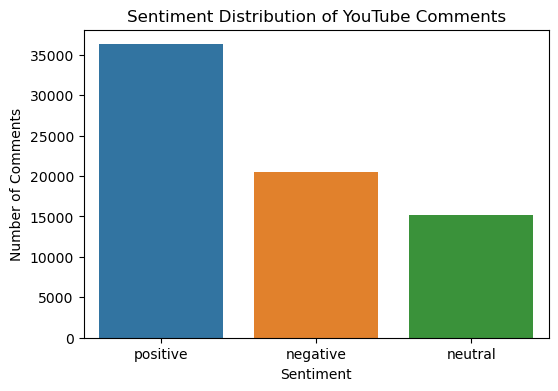

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the sentiment labels
sentiment_counts = df_youtube_en['sentiment_label'].value_counts()

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title("Sentiment Distribution of YouTube Comments")
plt.xlabel("Sentiment")
plt.ylabel("Number of Comments")
plt.show()


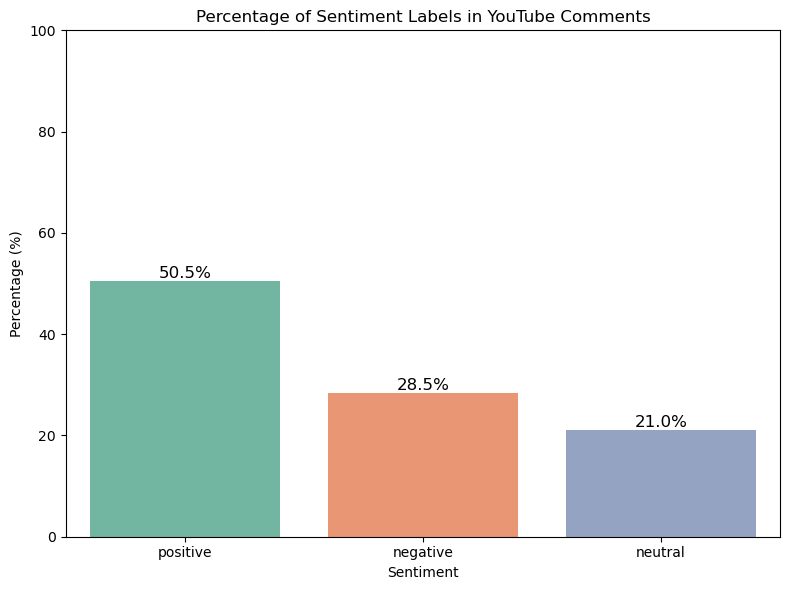

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count each sentiment label
sentiment_counts = df_youtube_en['sentiment_label'].value_counts(normalize=True) * 100  # convert to percent

sentiment_percent = (sentiment_counts / sentiment_counts.sum()) * 100

# Step 2: Create DataFrame
sentiment_df = sentiment_percent.reset_index()
sentiment_df.columns = ['Sentiment', 'Percentage']

# Step 3: Plot with percentages
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=sentiment_df, x='Sentiment', y='Percentage', palette='Set2')

# Step 4: Annotate bars with percentage values
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12)

# Customization
plt.title("Percentage of Sentiment Labels in YouTube Comments")
plt.ylabel("Percentage (%)")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


In [51]:
#3. Emotion Detection 
# Use pre-trained models like GoEmotions (Google) to label emotions (anger, joy, sadness, etc.).

In [52]:
#very long comment to a transformer model that exceeds the model’s token limit (typically 512 tokens for RoBERTa).
#That long text cannot be processed directly.
# so we truncate the input text to fit within the model's max token length (usually ~512 tokens = ~1000 characters)

In [53]:
from transformers import pipeline, AutoTokenizer

# Reload model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("j-hartmann/emotion-english-distilroberta-base")
emotion_classifier = pipeline(
    "text-classification",
    model="j-hartmann/emotion-english-distilroberta-base",
    tokenizer=tokenizer,
    top_k=None,
    truncation=True
)

# Safe wrapper with truncation
def classify_emotion_safe(text):
    try:
        # Truncate to 512 tokens safely
        encoded = tokenizer(text, truncation=True, max_length=512, return_tensors="pt")
        decoded = tokenizer.decode(encoded["input_ids"][0], skip_special_tokens=True)
        return emotion_classifier(decoded)
    except Exception as e:
        print(f"Error on text: {text[:50]} → {str(e)}")
        return None


Device set to use cpu


In [54]:
from tqdm import tqdm
tqdm.pandas()

df_youtube_en["emotion_scores"] = df_youtube_en["text"].progress_apply(classify_emotion_safe)

df_youtube_en["top_emotion"] = df_youtube_en["emotion_scores"].apply(
    lambda scores: max(scores[0], key=lambda x: x["score"])["label"] if scores else None
)


100%|██████████████████████████████████████████████████████████████████████████| 71854/71854 [1:25:38<00:00, 13.98it/s]


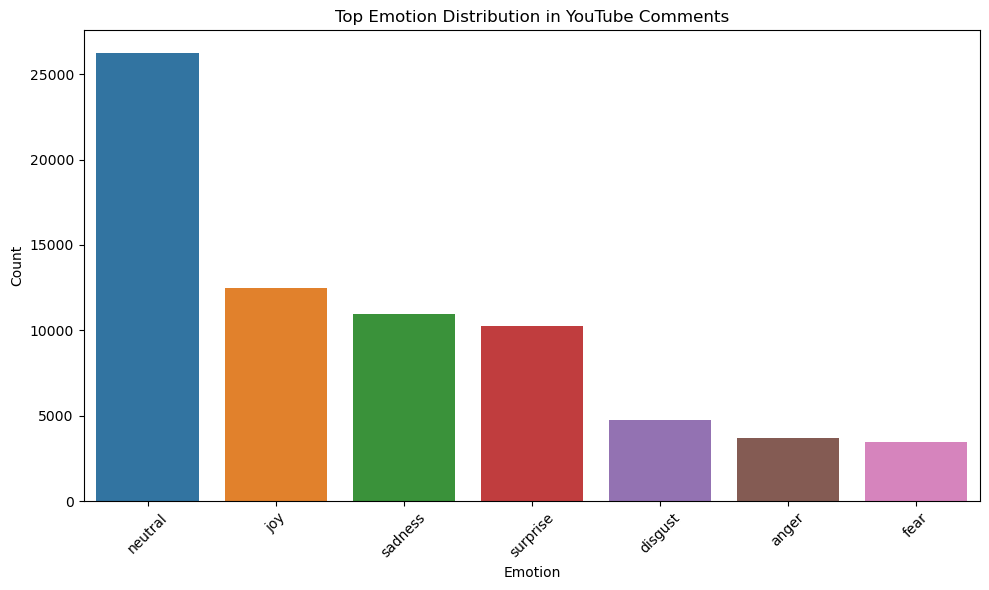

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count frequency of each top emotion
emotion_counts = df_youtube_en["top_emotion"].value_counts()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values)
plt.title("Top Emotion Distribution in YouTube Comments")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [56]:
#. Topic Modeling (Themes of mental health discussion)
# Use NLP preprocessing + LDA or BERTopic to identify dominant topics/themes.


In [57]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Preprocessing
stop_words = set(stopwords.words('english'))
df_youtube_en['tokens'] = df_youtube_en['text'].apply(lambda x: [word for word in word_tokenize(x.lower()) if word.isalpha() and word not in stop_words])

# Vectorization and LDA
vectorizer = CountVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x)
X = vectorizer.fit_transform(df_youtube_en['tokens'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Print top words in each topic
terms = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"Topic #{idx + 1}: ", [terms[i] for i in topic.argsort()[-10:]])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\seeya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\seeya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\seeya\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Topic #1:  ['way', 'would', 'artist', 'work', 'feel', 'think', 'mental', 'like', 'people', 'art']
Topic #2:  ['thanks', 'name', 'gogh', 'starry', 'night', 'van', 'like', 'love', 'thank', 'video']
Topic #3:  ['art', 'could', 'life', 'would', 'brother', 'ear', 'one', 'vincent', 'gogh', 'van']
Topic #4:  ['get', 'someone', 'one', 'think', 'shot', 'suicide', 'people', 'like', 'would', 'bipolar']
Topic #5:  ['vincent', 'watch', 'cry', 'gogh', 'van', 'episode', 'one', 'scene', 'time', 'doctor']


In [58]:
import numpy as np


# Get topic distributions per document (probability matrix)
topic_distributions = lda.transform(X)  # shape: (n_docs, n_topics)

# Assign dominant topic index (highest probability) for each comment
df_youtube_en['dominant_topic'] = np.argmax(topic_distributions, axis=1)


In [59]:

df_youtube_en['dominant_topic'] = np.argmax(topic_distributions, axis=1)


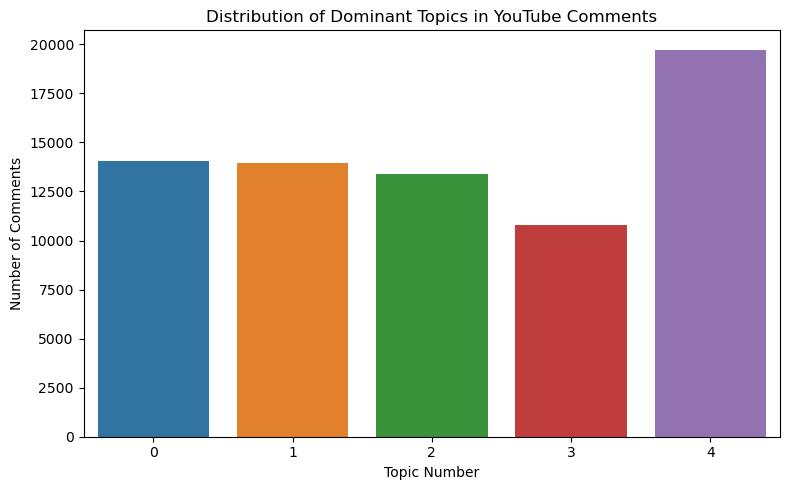

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count dominant topics
topic_counts = df_youtube_en['dominant_topic'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=topic_counts.index, y=topic_counts.values)
plt.title("Distribution of Dominant Topics in YouTube Comments")
plt.xlabel("Topic Number")
plt.ylabel("Number of Comments")
plt.tight_layout()
plt.show()


In [61]:
# 5. Artwork Association with Mental Health (e.g., Starry Night)
# Create a list of artwork names and check which ones co-occur with "mental health", "depression", etc.

In [86]:
artworks = ["Starry Night", "Wheatfield with Crows", "Irises", "The Bedroom", "Self-Portrait"]

def find_artwork_mentions(text):
    return [art for art in artworks if art.lower() in text.lower()]

df_youtube_en['artwork_mentions'] = df_youtube_en['text'].apply(find_artwork_mentions)
df_art_mentions = df_youtube_en[df_youtube_en['artwork_mentions'].map(len) > 0]


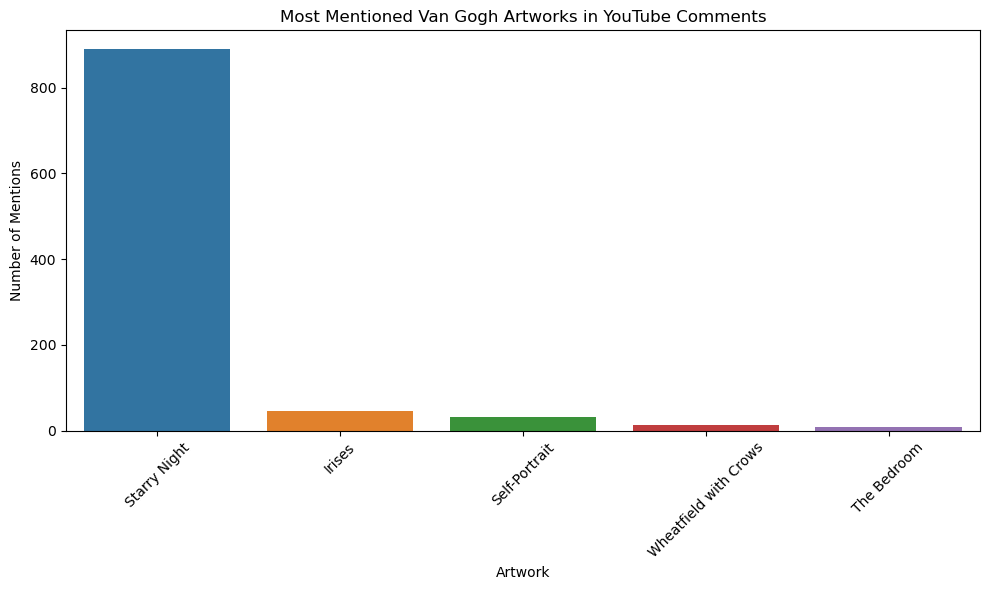

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Flatten the list of mentioned artworks and count
artwork_counts = Counter([art for sublist in df_art_mentions['artwork_mentions'] for art in sublist])

# Convert to a sorted dataframe for plotting
artwork_df = pd.DataFrame.from_dict(artwork_counts, orient='index', columns=['Count']).sort_values('Count', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=artwork_df.index, y=artwork_df['Count'])
plt.title("Most Mentioned Van Gogh Artworks in YouTube Comments")
plt.xlabel("Artwork")
plt.ylabel("Number of Mentions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [65]:
import pandas as pd
df = df_youtube_en 
# Filter comments that mention 'Starry Night'
df_starry = df[df['text'].str.contains('starry night', case=False, na=False)].copy()


In [66]:
# Convert sentiment column to numeric, if it's not already
df_starry['sentiment'] = pd.to_numeric(df_starry['sentiment'], errors='coerce')


In [68]:
!pip install textblob


     -------------------------------------- 624.3/624.3 kB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 3.2 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1


In [69]:
from textblob import TextBlob

# Calculate sentiment polarity for each comment
df_starry['sentiment'] = df_starry['text'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [70]:
# Convert published_at to datetime
df_starry['published_at'] = pd.to_datetime(df_starry['published_at'])


In [71]:
# Group by date and calculate average sentiment
df_starry['date'] = df_starry['published_at'].dt.date
sentiment_over_time = df_starry.groupby('date')['sentiment'].mean().reset_index()


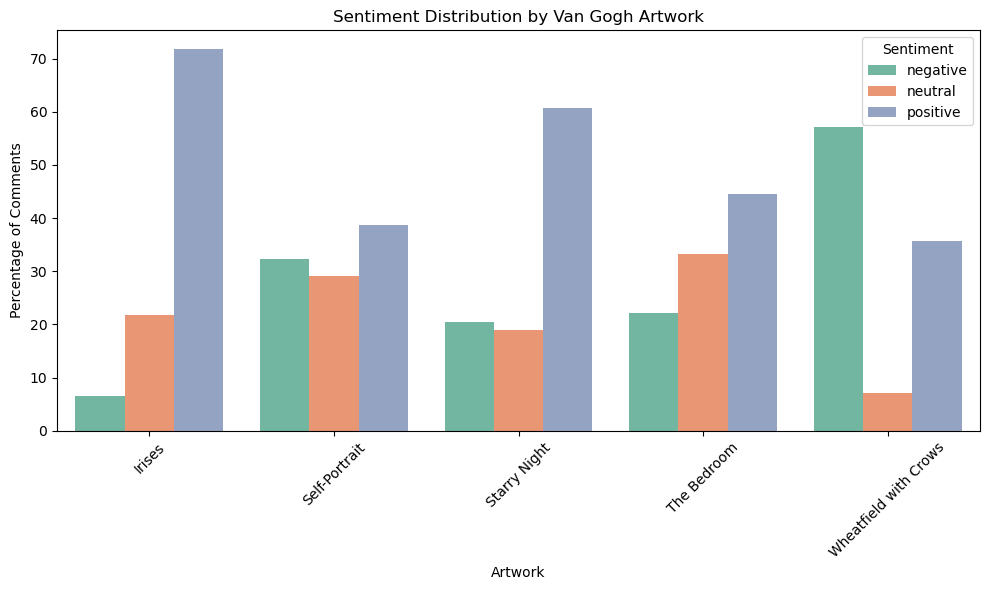

In [88]:
df_exploded = df_art_mentions.explode('artwork_mentions')
sentiment_by_artwork = df_exploded.groupby(['artwork_mentions', 'sentiment_label']).size().reset_index(name='count')
# Total per artwork
total_counts = sentiment_by_artwork.groupby('artwork_mentions')['count'].transform('sum')

# Add percentage column
sentiment_by_artwork['percentage'] = (sentiment_by_artwork['count'] / total_counts) * 100
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=sentiment_by_artwork, 
            x='artwork_mentions', 
            y='percentage', 
            hue='sentiment_label',
            palette='Set2')

plt.title("Sentiment Distribution by Van Gogh Artwork")
plt.xlabel("Artwork")
plt.ylabel("Percentage of Comments")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()


In [ ]:
#  6. Romanticization vs. Critique Tone
# Filter or tag comments that use keywords like "beautiful suffering", "mad genius", "romantic", "tragic" vs. those that mention "illness", "misunderstood", "needs help".

# Use keyword search or classify manually or using weak supervision.

In [80]:
romantic_terms = ["tragic beauty", "mad genius", "romantic", "inspired", "beautiful suffering"]
critical_terms = ["mental illness", "struggled", "depression", "suffering", "pain", "psychosis"]

def classify_tone(text):
    lower = text.lower()
    if any(term in lower for term in romantic_terms):
        return "romanticized"
    elif any(term in lower for term in critical_terms):
        return "challenging/realistic"
    else:
        return "neutral/other"

df_youtube_en['tone'] = df_youtube_en['text'].apply(classify_tone)


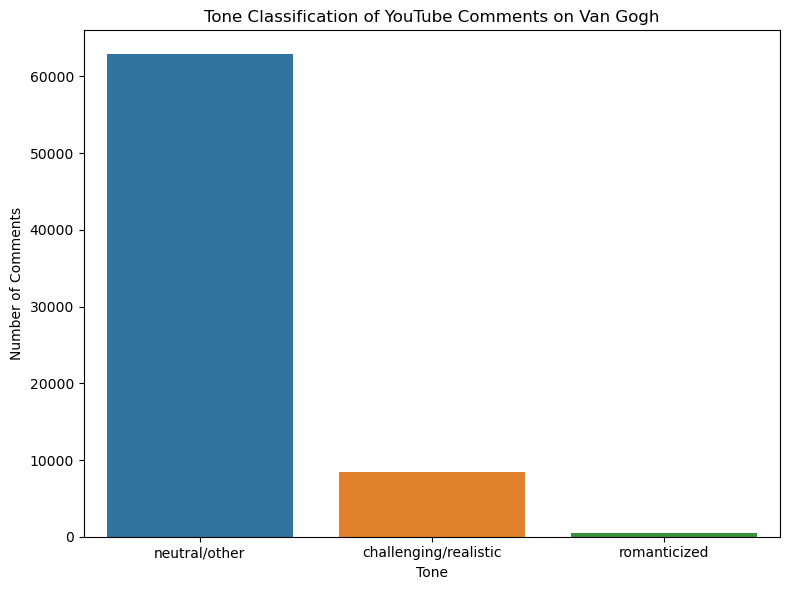

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count tones
tone_counts = df_youtube_en['tone'].value_counts()

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x=tone_counts.index, y=tone_counts.values)
plt.title("Tone Classification of YouTube Comments on Van Gogh")
plt.xlabel("Tone")
plt.ylabel("Number of Comments")
plt.tight_layout()
plt.show()
